In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

In [2]:
data_oli = xr.open_dataset('../data/model/oliktok.nc')

In [3]:
data_ascos = xr.open_dataset('../data/model/ascos.nc')

In [4]:
data_greenland = xr.open_dataset('../data/model/summit.nc')

In [5]:
rcp_oli = data_oli.RCP.load() * 1e3
rcp_ascos = data_ascos.RCP.load() * 1e3
rcp_greenland = data_greenland.RCP.load() * 1e3

rip_oli = (data_oli.RAP + data_oli.RPP + data_oli.RSP).load() * 1e3
rip_ascos = (data_ascos.RAP + data_ascos.RPP + data_ascos.RSP).load() * 1e3
rip_greenland = (data_greenland.RAP + data_greenland.RPP + data_greenland.RSP).load() * 1e3


In [6]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [7]:
from datetime import datetime, timezone
t_oli = datetime(2017,5,12,9,tzinfo=timezone.utc)
t_ascos = datetime(2008,8,31,6,tzinfo=timezone.utc)
t_smt = datetime(2019,7,2,6,tzinfo=timezone.utc)
t = [t_oli, t_ascos, t_smt]

In [8]:
oli_lims = (datetime(2017,5,12,3), datetime(2017,5,12,18), 0, 1000)
ascos_lims = (datetime(2008,8,31,0), datetime(2008,8,31,15), 0, 1200)
smt_lims = (datetime(2019,7,2,0), datetime(2019,7,2,12), 0, 1700)


/var/folders/g9/qqywy9zd20dcp36_ycz2hv1m0000gn/T/ipykernel_25977/778888245.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(major_tickalabels, rotation=0, horizontalalignment='center')


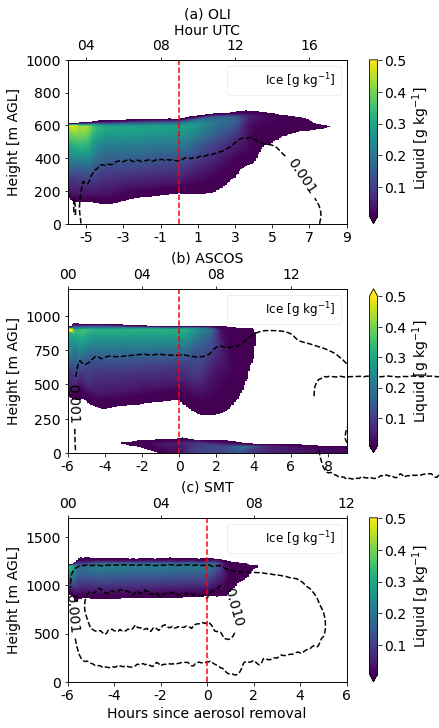

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(6,10), constrained_layout=True)

plts = [[rcp_oli, rip_oli, '(a) OLI', oli_lims],
        [rcp_ascos, rip_ascos, '(b) ASCOS', ascos_lims],
        [rcp_greenland, rip_greenland, '(c) SMT', smt_lims]]

for ax, (rcp, rip, title, lims), aero_time in zip(axs, plts, t):
    
    # aero_time = rcp.time[0].values + np.timedelta64(6,'h')
    t1, t2, y1, y2 = lims

    xlabel1 = True if title == '(c) SMT' else False
    xlabel2 = True if title == '(a) OLI' else False
    
    label = True 
    clabel= True 
    
    cbar_kwargs = dict(label='Liquid [g kg$^{-1}$]') 
    
    c = rcp.where(rcp >= 0.001).plot.pcolormesh('time', 'z', ax=ax, vmin=0.01, vmax=0.5, add_colorbar=True, cbar_kwargs=cbar_kwargs)
    i = rip.plot.contour('time', 'z', levels=[0.01, 0.001],colors = 'k', linestyles='dashed', ax=ax)

    
    # c.collections[0].set_label('Modeled Liq')
    if label:
        i.collections[0].set_label('Ice [g kg$^{-1}$]')
    

    # ob = cbh.plot(ax=ax, color='C0', label='CBH Obs')

    # ax.clabel(c, c.levels, inline=True)
    axb = ax.twiny()
    
    ax.set_xlim(t1, t2)
    axb.set_xlim(t1, t2)
    
    time_ticks = ax.get_xticks()
    major_tickalabels = (np.asarray(mdates.num2date(time_ticks)) - aero_time).astype('timedelta64[h]').astype(int)

    axb.set_xticks(ax.get_xticks()[::2])
    axb.set_xticklabels([i.strftime('%H') for i in mdates.num2date(time_ticks[::2])])
    if xlabel2:
        axb.set_xlabel("Hour UTC")
    ax.set_xticklabels(major_tickalabels, rotation=0, horizontalalignment='center')

    ax.set_ylim(y1,y2)
    
    ax.clabel(i, i.levels, inline=True)
    
    if xlabel1:
        ax.set_xlabel('Hours since aerosol removal')
    else:
        ax.set_xlabel('')

    ax.legend(loc='upper right', framealpha=0.3)
    
    ax.axvline(aero_time, color='r', linestyle='dashed')
    
    # ax.set_xticks(time_ticks)
    # ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    
    
    

    ax.set_ylabel('Height [m AGL]')

plt.savefig('fig05.png', facecolor='w', dpi=300)